<a href="https://colab.research.google.com/github/khaaair/Posttest2-Datmin/blob/main/Posttest2_B2_079_Khairunnisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

# 1. Apriori

## Tabel Tabulasi

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Tabel Tabulasi
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTabel Tabulasi")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


Tabel Tabulasi
    beef  butter  butter milk  canned beer  cling film/bags  curd  dental care  detergent  dish cleaner  frankfurter  frozen meals  frozen vegetables  hygiene articles  misc. beverages  \
0      0       0            0            0                0     0            0          0             0            0             0                  0                 0                0   
1      0       0            0            0                0     0            0          0             0            0             0                  0                 0                0   
2      0       0            0            0                0     0            0          0             0            0             0                  0                 0                0   
3      0       0            0            1                0     0            0          0             0            0             0                  0                 0                1   
4      0       0            0            0  

<ipython-input-7-53d8c67f2949>:26: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


In [8]:
# Menampilkan dataset dari market_basket :
df = pd.read_csv("https://raw.githubusercontent.com/khaaair/Posttest2-Datmin/main/dataset_market_basket.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Menampilkan sum/menghitung jumlah nilai disetiap column :
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [10]:
# Menampilkan column apa saja yang terdapat di dalam dataset :
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate',
       'frozen meals', 'dental care', 'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

## Daftar Support dan Confidence

In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
# Daftar data dalam form list transaksi :
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)

                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(sausage, semi-finished bread, whole milk)           5.26%
(sausage, semi-finished bread, yogurt)               5.26%
(sausage, yogurt, whole milk)                        5.26%
(semi-finished bread, yogurt, whole milk)            5.26%
(sausage, semi-finished bread, yogurt, whole milk)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
beef                         white bread   5.26%    100.0

# 2. KNN

In [31]:
# Memasukkan dataset ke dalam dataframe :
df2 = pd.read_csv('https://raw.githubusercontent.com/khaaair/Posttest2-Datmin/main/deteksi_uang_palsu.csv')
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [34]:
import pandas as pd
import math

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df2['jarak'] = df2.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print('Tabel Jarak')
print(df2['jarak'])

Tabel Jarak
0    162.985541
1    163.637621
2    163.039278
3    163.154696
4    163.132317
5    160.664595
6    161.413998
7    162.060927
8    161.346813
9    161.291210
Name: jarak, dtype: float64


In [35]:
# Menambah column jarak :
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200 :
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length       jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  162.985541
1        True    171.66       103.68        103.41        4.35       3.33  113.74  163.637621
2        True    172.23       104.00        103.35        4.43       2.95  113.12  163.039278
3        True    172.07       104.21        103.82        4.29       3.35  113.30  163.154696
4        True    171.79       104.57        104.04        4.26       3.15  113.46  163.132317
5       False    172.00       104.23        104.52        5.76       3.37  110.94  160.664595
6       False    171.56       104.03        103.93        5.47       3.50  111.67  161.413998
7       False    171.90       104.33        104.40        4.70       3.31  112.12  162.060927
8       False    171.84       104.06        104.10        4.87       3.25  111.04  161.346813
9       False    172.11       104.14        104.15        4.

In [36]:
# Mengurutkan jarak terdekat
import pandas as pd
import math

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df2.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df2['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df2)))
df2_sorted = df2.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df2_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df2_sorted[df2_sorted["is_genuine"] == True])
num_false = len(df2_sorted[df2_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


Jumlah True:  3
Jumlah False:  0


## Menentukan Hasil Analasis

In [38]:
# mengambil data terdekat dengan target
data = pd.read_csv("https://raw.githubusercontent.com/khaaair/Posttest2-Datmin/main/deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# menghitung jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# menambahkan kolom jarak ke data
data['distance'] = distances['distance']

# mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# melakukan klasifikasi berdasarkan mayoritas kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# menampilkan hasil prediksi
print("Hasil prediksi: ", pred_label)

Hasil prediksi:  True


# 3. Analisis

**Business Understanding**

US Health Insurance adalah sistem yang kompleks dan seringkali membingungkan yang mungkin sulit dipahami dan dinavigasi oleh individu dan keluarga. Sistem ini sebagian besar bersifat pribadi, dengan mayoritas orang Amerika menerima perlindungan asuransi kesehatan mereka melalui majikan mereka. Namun, ada juga program yang disponsori pemerintah seperti Medicare dan Medicaid yang menyediakan asuransi kesehatan bagi mereka yang memenuhi syarat berdasarkan kriteria tertentu. Biaya asuransi kesehatan dapat sangat bervariasi tergantung pada faktor-faktor seperti usia, status kesehatan, lokasi, dan tingkat pertanggungan yang dibutuhkan. Deductible, co-pays, dan out-of-pocket juga bisa menjadi signifikan, membuat banyak orang Amerika menghadapi tantangan keuangan ketika berurusan dengan biaya perawatan kesehatan. Terlepas dari tantangan ini, akses ke asuransi kesehatan sangat penting untuk menjaga kesehatan dan kesejahteraan individu dan komunitas, dan upaya terus dilakukan untuk meningkatkan sistem perawatan kesehatan AS dan membuat perawatan kesehatan lebih terjangkau dan dapat diakses oleh semua orang.

## Data Understanding

Data didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset?resource=download

In [39]:
df3 = pd.read_csv("https://raw.githubusercontent.com/khaaair/Posttest2-Datmin/main/insurance.csv")
df3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Describe Data

Dataset ini berisi 1338 baris data tertanggung, di mana biaya Asuransi diberikan terhadap atribut tertanggung berikut : Usia, Jenis Kelamin, IMT, Jumlah Anak, Perokok dan Wilayah. Atribut adalah campuran variabel numerik dan kategori.
Tidak ada nilai yang hilang atau tidak terdefinisi dalam kumpulan data.

In [41]:
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
print("Daftar columns yang ada pada dataframe :")
for col in df3.columns:
  print(col)

Daftar columns yang ada pada dataframe :
age
sex
bmi
children
smoker
region
charges



Penjelasan Pada Tiap Columns

1. Age: Kolom age menunjukkan usia pasien dalam tahun.

2. Sex : Kolom sex menunjukkan jenis kelamin pasien.

3. BMI : Kolom bmi menunjukkan indeks massa tubuh pasien. Indeks massa tubuh, memberikan pengertian tentang tubuh, bobot yang relatif tinggi atau relatif rendah

4. Children : Kolom children menunjukkan jumlah anak yang ditanggung asuransi kesehatan / jumlah tanggungan.

5. Smoker : Kolom smoker menunjukkan pasien merokok / tidak.

6. Region : Kolom region menunjukkan area pemukiman penerima manfaat di AS, timur laut, tenggara, barat daya, barat laut.

7. Charges : Kolom charges menunjukkan biaya medis individu ditagih oleh asuransi kesehatan

## **Explore Data**

Beberapa kolom data akan divisualisasikan untuk menjelajahi data lebih lanjut lagi (menggunakan scatterplot dan countplot)

Pada countplot, beberapa kolom akan dibandingkan secara satu - persatu dengan kolom 'hypertension' untuk melihat apakah hubungan antara kolom - kolom ini berbanding lurus dengan kolom 'heart_disease' atau sebaliknya

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='children', ylabel='count'>

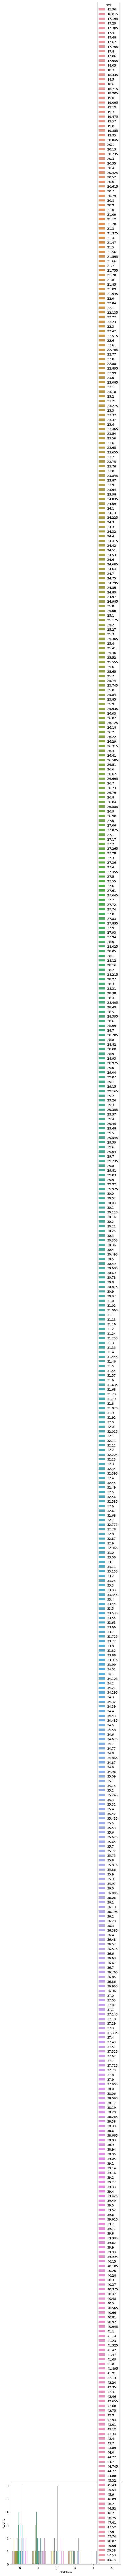

In [46]:
import seaborn as sns
sns.countplot(data=df3,x="children",hue="bmi")

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


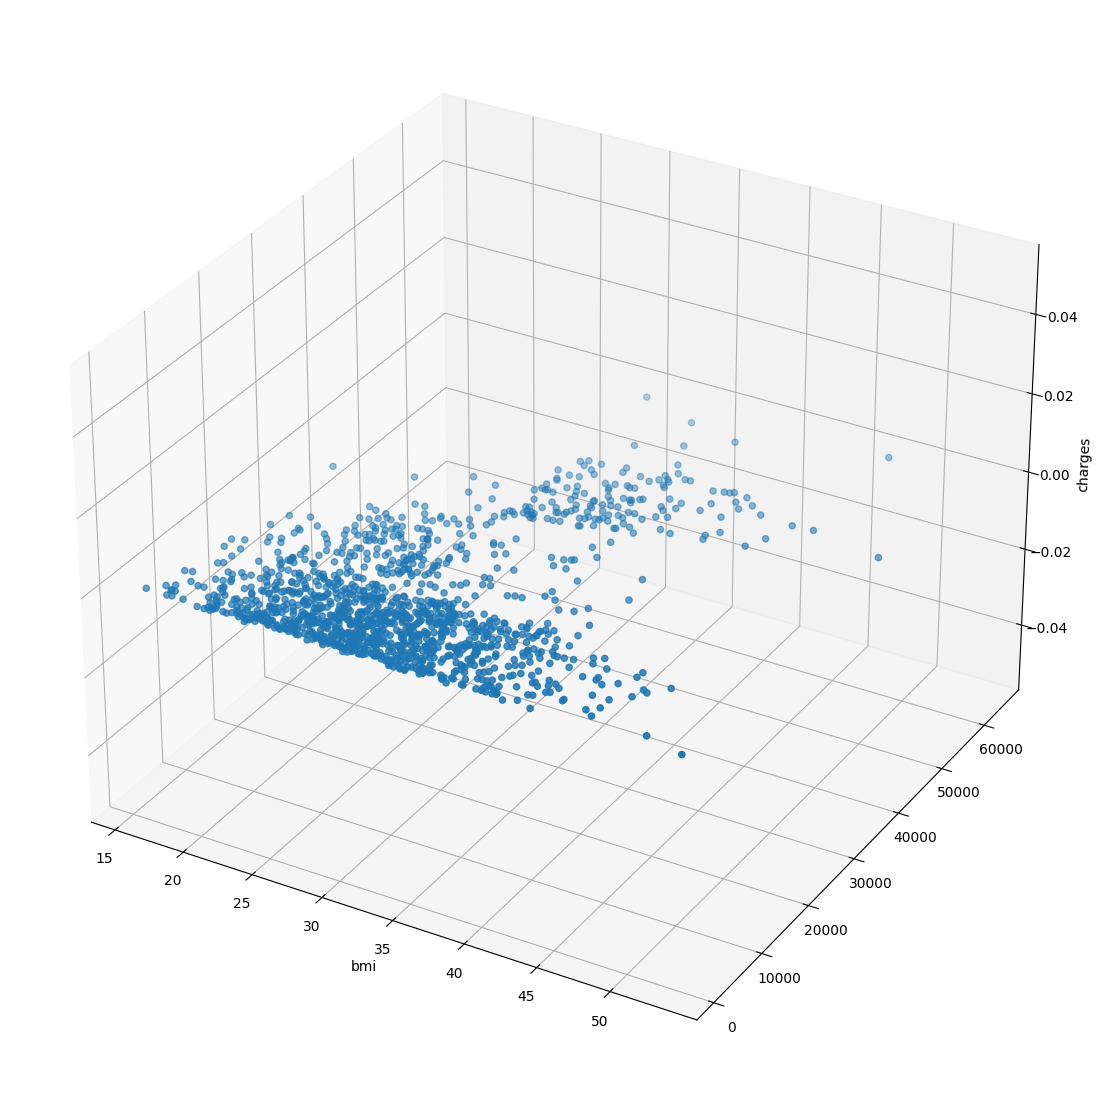

In [48]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df3['bmi'],df3['charges'])

axes.set_xlabel('bmi')
axes.set_zlabel('charges')
plot.show()

## Verifikasi Quality Data

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

## Validasi Data

Data - data yang tercakup pada dataframe di atas valid, karena berdasarkan sumber datanya, data tersebut adalah data yang tercatat pada saat kampanye dilakukan sehingga data - data tersebut cukup untuk digunakan dalam proyek ini.

## Duplikasi Data

In [49]:
is_duplicated = df3.duplicated().any()
print("Status Duplikasi :",is_duplicated)

Status Duplikasi : True


Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data, didukung oleh adanya kolom ID atau identifikasi pasien agar data - data mereka tidak terlantar, tertukar, terduplikasi, dan masalah lainnya.

## Data Preparation

In [50]:
# Select Data
df3 = pd.read_csv("https://raw.githubusercontent.com/khaaair/Posttest2-Datmin/main/insurance.csv")

## Clean Data

In [51]:
df3.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Transformasi Data

In [52]:
df3 = pd.get_dummies(df3)
print(df3)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  region_northwest  region_southeast  region_southwest
0      19  27.900         0  16884.92400           1         0          0           1                 0                 0                 0                 1
1      18  33.770         1   1725.55230           0         1          1           0                 0                 0                 1                 0
2      28  33.000         3   4449.46200           0         1          1           0                 0                 0                 1                 0
3      33  22.705         0  21984.47061           0         1          1           0                 0                 1                 0                 0
4      32  28.880         0   3866.85520           0         1          1           0                 0                 1                 0                 0
...   ...     ...       ...          ...         ...

## Slicing Data

In [54]:
df3 = df3.iloc[0:500,:]
df3

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,20,27.930,0,1967.02270,0,1,1,0,1,0,0,0
496,31,23.600,2,4931.64700,1,0,1,0,0,0,0,1
497,45,28.700,2,8027.96800,0,1,1,0,0,0,0,1
498,44,23.980,2,8211.10020,1,0,1,0,0,0,1,0


Dataset yang telah direduksi di atas selanjutnya akan dipotong / *slicing data*, yaitu memilih sebagian kecil atau subset dari dataset yang digunakan untuk analisis atau pemodelan dengan tujuan untuk memudahkan analisis dan pemodelan dengan mengurangi kompleksitas dataset dan fokus pada variabel atau fitur yang paling relevan atau penting.

## Split Data

In [55]:
from sklearn.model_selection import train_test_split
x = df3.drop('bmi',axis=1)
y = df3['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Data Latih yang Akan Digunakan :\n",x_train)
print("Data Uji yang Akan Digunakan :\n",x_test)

Data Latih yang Akan Digunakan :
      age  children      charges  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  region_northwest  region_southeast  region_southwest
5     31         0   3756.62160           1         0          1           0                 0                 0                 1                 0
116   58         0  11381.32540           0         1          1           0                 0                 0                 1                 0
45    55         0  20630.28351           0         1          1           0                 0                 0                 0                 1
16    52         1  10797.33620           1         0          1           0                 1                 0                 0                 0
462   62         2  15230.32405           1         0          1           0                 1                 0                 0                 0
..   ...       ...          ...         ...       ...        ...        